# 휴먼지능정보공학과 201810808  정민지

## 문제: Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델



Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.



from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)



Sklearn으로 이진 베이지안 모델링을 해보자.

* (1) X, Y 데이터를 생성

* (2) X의 평균과 표준편차 계산해서 출력

* (3) 그래프 작성

    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

* (4) 훈련데이터, 테스트데이터 3:1로 분리

   * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

* (5) 훈련데이터에 대하여 BernoulliNB 모델링

    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

* (6) 테스트데이터에 대하여 예측값을 출력

    * 예측이 맞는지 실제값 Y와 비교해보자.

* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

끝

## (1) X, Y 데이터를 생성

In [13]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [16]:
print(X.shape)
print(X[:3])

print(Y.shape)
print(Y[:3]) #Y: 1 or 0

(100, 2)
[[-1.0615263  -1.18167584]
 [-0.49544947  0.77065528]
 [-0.39638259  0.33651873]]
(100,)
[0 1 1]


## (2) X의 평균과 표준편차 계산해서 출력

In [20]:
print('평균: ',X.mean())
print('표준편차:', X.std())

평균:  0.0620596668164519
표준편차: 1.3042693661268494


## (3) 그래프 작성

Text(0, 0.5, 'X[:,1]')

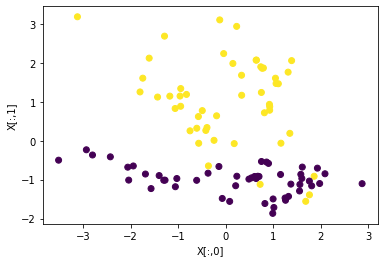

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')


## (4) 훈련데이터, 테스트데이터 3:1로 분리

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=41)

## (5) 훈련데이터에 대하여 BernoulliNB 모델링

In [96]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=0.0)
clf.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## (6) 테스트데이터에 대하여 예측값을 출력

In [99]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [103]:
import pandas as pd
df=pd.DataFrame({'Predicted':clf.predict(X_test),'Y_test':Y_test})
df['compare result']=df['Predicted']==df['Y_test']

In [104]:
df

,Predicted,Y_test,compare result
0,1,1,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,1,1,True
7,0,0,True
8,0,1,False
9,0,0,True


In [108]:
df[df['compare result']==False]

,Predicted,Y_test,compare result
8,0,1,False
22,0,1,False
24,0,1,False


## (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [109]:
clf.score(X_test,Y_test)

0.88

## 